In [1]:
import pandas as pd
import os

# Directories containing the .en files
directories = ['/media/storage_6/mot/final/mot/3guests@MOF/reg', '/media/storage_6/mot/79/MOF5-manuel', '/media/storage_6/mot/79/guest_rigid']

# Dictionary to store DataFrames with different names (E1, E2, E3, etc.)
dfs_by_name = {}

# Iterate through directories
for idx, directory in enumerate(directories, start=1):
    # Get a list of .en files sorted in ascending order based on their names
    en_files = sorted([filename for filename in os.listdir(directory) if filename.endswith('.en')])
    
    # List to store DataFrames for the current directory
    dfs = []
    
    # Loop through sorted files in the current directory
    for filename in en_files:
        file_path = os.path.join(directory, filename)
        # Load each .en file into a DataFrame and append to the list
        df = pd.read_csv(file_path, delimiter='\s+', header=None)
        df['run'] = filename
        dfs.append(df)
    
    # Concatenate all DataFrames in the current directory into a single DataFrame
    merged_df = pd.concat(dfs, axis=0, ignore_index=True)
    
    # Add values in column 5 (index 4) with values in column 7 (index 6) and store in a new column 'E_tot'
    merged_df['E_tot'] = merged_df.iloc[:, 4] + merged_df.iloc[:, 6]
    
    # Store the merged DataFrame with a unique name (E1, E2, E3, etc.)
    df_name = f'E{idx}'
    dfs_by_name[df_name] = merged_df

# Now, dfs_by_name is a dictionary where keys are names (E1, E2, E3, etc.) and values are corresponding DataFrames
# You can access each DataFrame using dictionary keys, for example: dfs_by_name['E1']


In [2]:
dfs_by_name["E1"].head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,run,20,21,E_tot
0,2,1.0,297.433435,694.592321,-621664.732419,0.0,428.224240,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.842889e-16,12.0,MOF5-md-01.en,NaN,NaN,-621236.508179
1,4,1.0,302.458195,248.601614,-621669.683087,0.0,435.458544,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7.808058e-16,9.5,MOF5-md-01.en,NaN,NaN,-621234.224543
2,6,1.0,312.937229,-37.744076,-621685.486120,0.0,450.545537,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8.160349e-16,9.5,MOF5-md-01.en,NaN,NaN,-621234.940583
3,8,1.0,311.110341,-270.915658,-621686.232629,0.0,447.915309,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.317520e-15,10.0,MOF5-md-01.en,NaN,NaN,-621238.317320
4,10,1.0,315.757838,-493.538478,-621691.207421,0.0,454.606456,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.802691e-15,10.0,MOF5-md-01.en,NaN,NaN,-621236.600965


In [3]:
dfs_by_name["E1"].tail()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,run,20,21,E_tot
129995,259992,1.0,312.626961,232.466072,-621692.508094,0.0,450.098834,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,17747.956710,0.650200,MOF5-md-12.en,1.576891e-15,7.5,-621242.409260
129996,259994,1.0,302.340080,-253.354009,-621681.962460,0.0,435.288490,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,17747.891374,0.650203,MOF5-md-12.en,1.296167e-15,7.0,-621246.673970
129997,259996,1.0,304.557814,-1021.311320,-621689.136789,0.0,438.481431,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,17747.344379,0.650223,MOF5-md-12.en,1.858074e-15,7.0,-621250.655358
129998,259998,1.0,297.204715,-1088.799501,-621681.887283,0.0,427.894943,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,17746.601553,0.650250,MOF5-md-12.en,1.891007e-15,7.5,-621253.992340
129999,260000,1.0,301.397844,-447.990460,-621685.201076,0.0,433.931923,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,17746.194126,0.650265,MOF5-md-12.en,1.708883e-15,8.0,-621251.269153


In [4]:
dfs_by_name["E2"].head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,run,20,21,E_tot
0,2,1.0,315.476911,-323.394429,-535051.459108,0.0,368.627708,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8.550008e-16,5.0,MOF5-md-01.en,NaN,NaN,-534682.831401
1,4,1.0,290.644782,42.465293,-535018.277216,0.0,339.611921,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.223900e-16,4.0,MOF5-md-01.en,NaN,NaN,-534678.665295
2,6,1.0,292.046604,-154.670221,-535019.859734,0.0,341.249919,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.818739e-16,4.5,MOF5-md-01.en,NaN,NaN,-534678.609814
3,8,1.0,295.910572,-181.533514,-535027.090171,0.0,345.764879,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.486242e-16,4.5,MOF5-md-01.en,NaN,NaN,-534681.325292
4,10,1.0,298.502307,181.235187,-535027.076753,0.0,348.793263,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7.205265e-16,4.0,MOF5-md-01.en,NaN,NaN,-534678.283490


In [5]:
dfs_by_name["E2"].tail()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,run,20,21,E_tot
24995,49992,1.0,291.309105,-14.604141,-535047.559597,0.0,340.388168,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,17849.228940,0.573029,MOF5-md-07.en,3.811486e-14,4.5,-534707.171430
24996,49994,1.0,284.751993,118.626497,-535030.135195,0.0,332.726328,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,17849.280146,0.573027,MOF5-md-07.en,3.849794e-14,4.5,-534697.408867
24997,49996,1.0,281.862789,-77.077741,-535027.799959,0.0,329.350359,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,17849.284300,0.573027,MOF5-md-07.en,3.791600e-14,4.5,-534698.449600
24998,49998,1.0,283.735450,-609.510089,-535034.595628,0.0,331.538522,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,17848.971009,0.573037,MOF5-md-07.en,3.835924e-14,4.5,-534703.057107
24999,50000,1.0,282.262424,-859.717747,-535026.542859,0.0,329.817323,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,17848.433177,0.573055,MOF5-md-07.en,3.877180e-14,4.5,-534696.725536


In [6]:
dfs_by_name["E3"].head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,run,E_tot
0,2,1.0,186.473412,-16.966299,-28826.792234,0.0,16.860536,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.985826e-17,0.0,ligand-01.en,-28809.931698
1,4,1.0,613.698357,-10.530093,-28868.258859,0.0,55.489323,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.610073e-17,0.5,ligand-01.en,-28812.769536
2,6,1.0,263.792372,9.474004,-28833.231768,0.0,23.851555,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.571460e-17,0.0,ligand-01.en,-28809.380213
3,8,1.0,534.016630,5.682187,-28862.719368,0.0,48.284668,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.143615e-17,0.5,ligand-01.en,-28814.434700
4,10,1.0,446.680069,0.401742,-28853.144182,0.0,40.387878,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.940969e-17,0.0,ligand-01.en,-28812.756303


In [7]:
dfs_by_name["E3"].tail()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,run,E_tot
26745,53492,1.0,294.786004,-2.471756,-28860.128525,0.0,26.653934,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.558649e-16,0.0,ligand-07.en,-28833.474591
26746,53494,1.0,253.476034,0.240312,-28855.800931,0.0,22.918773,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.244933e-16,0.5,ligand-07.en,-28832.882158
26747,53496,1.0,316.215293,1.042399,-28861.179350,0.0,28.591526,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.102684e-16,0.0,ligand-07.en,-28832.587824
26748,53498,1.0,358.952161,-0.052844,-28864.953156,0.0,32.455704,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.523323e-16,0.0,ligand-07.en,-28832.497452
26749,53500,1.0,306.551610,-0.834434,-28860.414945,0.0,27.717756,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.974620e-16,0.5,ligand-07.en,-28832.697189


In [8]:
avg_1 = dfs_by_name["E1"].iloc[:, 23].mean()
avg_2 = dfs_by_name["E2"].iloc[:, 23].mean()
avg_3 = dfs_by_name["E3"].iloc[:, 21].mean()

print(avg_1, avg_2, avg_3)

-621260.9876434952 -534688.4489472613 -28841.273712547216


In [9]:
U_int = dfs_by_name["E1"].iloc[:, 23] - (avg_2 + 3*avg_3)

print(U_int.mean()*4.184)
print(U_int)

-203.83426514976907
0        -24.238094
1        -21.954458
2        -22.670498
3        -26.047235
4        -24.330880
            ...    
129995   -30.139175
129996   -34.403885
129997   -38.385273
129998   -41.722255
129999   -38.999068
Name: E_tot, Length: 130000, dtype: float64


/home/mot/.local/lib/python3.9/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


avg of second half: -236.24083232230626 kJ/mol


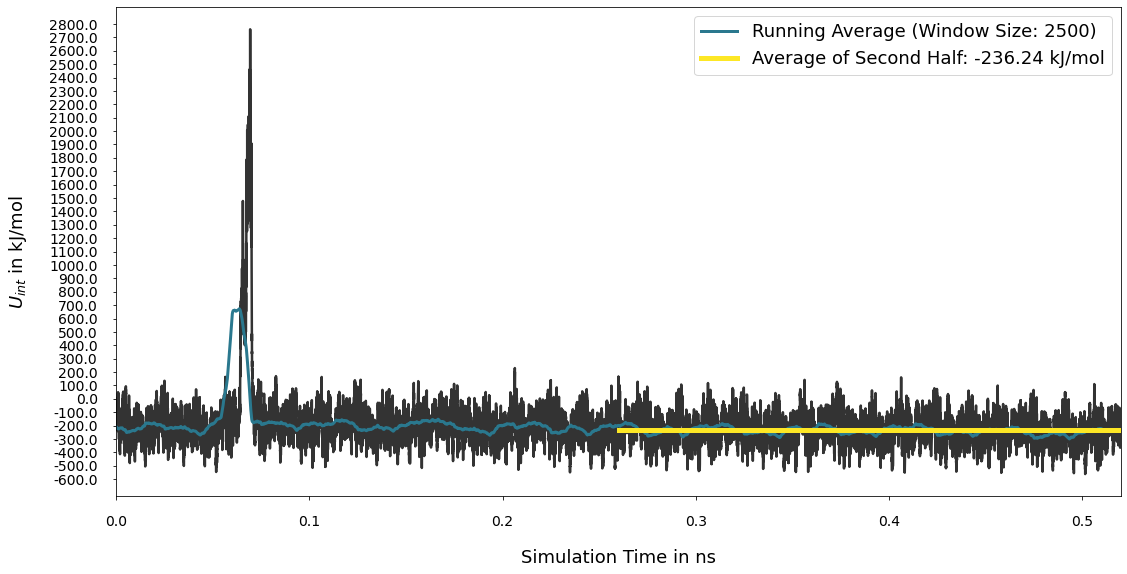

In [10]:
import matplotlib.pyplot as plt
import numpy as np
#from matplotlib.pyplot import colormaps
import seaborn as sns

plt.style.use('default')
sns.set_style(rc = {'axes.facecolor': '#FFFFFF'})

#plt.style.use('default')

# Assuming dfs_by_name is the dictionary containing your DataFrames (E1, E2, E3, etc.)
# For example, dfs_by_name = {'E1': E1, 'E2': E2, 'E3': E3, ...}

# Specify the end point for the transparent range
x_end = 0.0 # end of the transparent range (set your value)


# Get x-values from DataFrame E1
x_values = dfs_by_name['E1'].iloc[: 0] * 2 / 1000000  # Assuming column 1 is used as x-values

# Get y-values from DataFrame E2
y_values = U_int * 4.184 

# Convert to NumPy arrays
x_values = np.array(dfs_by_name['E1'].iloc[:, 0]) * 2 / 1000000  # Convert to array
y_values = np.array(U_int) * 4.184  # Convert to array

x_values = np.sort(x_values)

# Calculate the mean of the second part of y_values
second_part_mean = y_values[len(y_values) // 2:].mean()

print(f'avg of second half: {second_part_mean} kJ/mol')

# Calculate running average with a window size of 100 data points
window_size = 2500
running_avg = np.convolve(y_values, np.ones(window_size)/window_size, mode='valid')
#print(f"current running avg: {running_avg[-1]} kJ/mol")

# Adjust x-values to match the running average length
adjusted_x_values = np.sort(x_values[:len(running_avg)])

# Plotting x-values vs y-values
plt.figure(figsize=(18, 9))
plt.xlim(min(x_values), max(x_values))
#plt.plot(x_values[1:-1], y_values[1:-1], linewidth="1", color="k", alpha=0.8)

# Part 1: From the start up to x_end (transparent)
mask1 = x_values <= x_end
plt.plot(x_values[mask1], y_values[mask1], linewidth="2.5", color="k", alpha=0.3)

# Part 2: From x_end to the end (non-transparent)
mask2 = x_values > x_end
plt.plot(x_values[mask2], y_values[mask2], linewidth="2.5", color="k", alpha=0.8)

# Plotting running avg
plt.plot(adjusted_x_values, running_avg, linestyle='-', color="#2a788e", linewidth="3", label=f'Running Average (Window Size: {window_size})')

# Determine the range for x-axis ticks
x_min = min(x_values)
x_max = max(x_values)
y_min = min(y_values)
y_max = max(y_values)
x_ticks = np.arange(x_min, x_max, 0.1)  # Adjust 0.1 to the desired spacing
plt.xticks(x_ticks, fontsize="14")  # Set x-axis ticks
#y_ticks = np.arange(y_min, y_max, 100)
#plt.yticks(y_ticks, fontsize="12")

# Round down y_min to the nearest 100 and round up y_max to the nearest 100
y_start = 100 * (y_min // 100)
y_end = 100 * (y_max // 100 + 1)

# Generate y-axis ticks
y_ticks = np.arange(y_start, y_end+0.000001, 100,)  # Adjust 100 to the desired spacing

# Add the specific number to the existing y_ticks
specific_number = second_part_mean  # Replace with your specific number
#y_ticks = np.append(y_ticks, specific_number)

# Define custom labels for the y-axis
y_labels = [f'{tick}' if tick != specific_number else r'$\mathbf{' + f'{tick:.2f}' + '}$' for tick in y_ticks]


plt.yticks(y_ticks, y_labels, fontsize="14")  # Set y-axis ticks

# Add this line to display tick mark lines inside the plot area
plt.tick_params(axis='both', which='both', direction='out', bottom=True, top=False, left=True, right=False, pad=15)

# Specify xmin parameter to visually show the second half of the mean line
#plt.axvline(x=x_max/2, linestyle='-', color="#fde725", linewidth="2.5")
plt.axhline(y=second_part_mean, linestyle='-', color="#fde725", linewidth="5",label=f'Average of Second Half: {second_part_mean:.2f} kJ/mol', xmin=0.5, xmax=1)
plt.xlabel('Simulation Time in ns', fontsize='18', labelpad = 20)
plt.ylabel(r'$U_{int}$ in kJ/mol', fontsize='18', labelpad = 20)
#plt.title('ΔU of 1guest@MOF')
#plt.grid(linestyle="-")
#plt.fill_between(running_avg.index, 0, running_avg, color="b", alpha=0.1)
#plt.legend()
plt.grid(False)
plt.legend(fontsize='18', loc = "upper right")
plt.savefig("/home/mot/mot/analysis/Pics/U_int/3guests_reg@MOF.png")
plt.show()